In [2]:
import numpy as np
from scipy.special import i0, i1
import matplotlib.pyplot as plt
%matplotlib widget

In [3]:
def dot(x, y):
    return np.sum(x*y)

def norm(x):
    return np.sqrt(dot(x, x))

def free_energy(T, phi1, phi2, J12, J1, J2, omega1, omega2):
    '''phi1, phi2, omega1, omega2 are 2D arrays'''
    return T/J12 * dot(phi1, phi2) + J1*J2/T * dot(omega1, omega2)- 1/J12 * (J2*dot(phi1, omega2) + J1*dot(phi2, omega1)) - np.log(i0(norm(phi1))) - np.log(i0(norm(phi2)))

def free_energy_phi(T, phi1, phi2, A1, A2, J12, J1, J2, omega1, omega2):
    return A1*A2*T/J12 * np.cos(phi1-phi2) + J1*J2/T * np.cos(omega1-omega2) - 1/J12 * (A1*J2*np.cos(phi1-omega2) + A2*J1*np.cos(phi2-omega1)) - np.log(i0(A1)) - np.log(i0(A2))

def free_energy_alignament(T, phi1, phi2, A1, A2, J12, J1, J2):
    return A1*A2*T/J12 * np.cos(phi1-phi2) - np.log(i0(A1)) - np.log(i0(A2))

In [4]:
# define angle and amplitude of phi1 and phi2
phi1 = np.linspace(0, 2*np.pi, 100)
phi2 = np.linspace(0, 2*np.pi, 100)
A1 = 1
A2 = 1

# convert to 2D arrays



Text(0, 0.5, '$\\phi_2$')

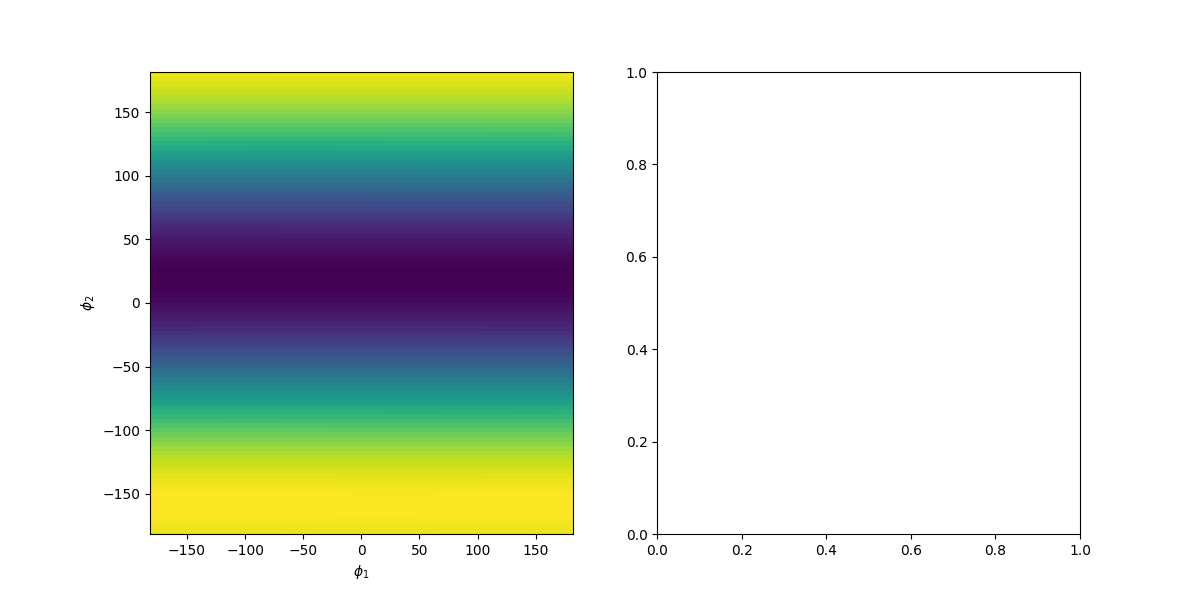

In [5]:
# plot free energy and free_energy_phi for a given set of parameters in 2 subplots

# plot heatmap of potential function
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# create a meshgrid of theta1 and theta2
phi1 = np.linspace(-np.pi, np.pi, 100)
phi2 = np.linspace(-np.pi, np.pi, 100)
phi1, phi2 = np.meshgrid(phi1, phi2)

# define the parameters
T = 0.2
J12 = 10
J1 = 100
J2 = 0
A1 = 1
A2 = 1
omega1 = np.radians(20)
omega2 = np.radians(0)

# calculate the potential
F = free_energy_phi(T, phi1, phi2, A1, A2, J12, J1, J2, omega1, omega2)

# plot the potential
ax1.pcolormesh(np.degrees(phi1), np.degrees(phi2), F, cmap='viridis')
ax1.set_xlabel(r'$\phi_1$')
ax1.set_ylabel(r'$\phi_2$')


Text(0, 0.5, '$\\phi_2$')

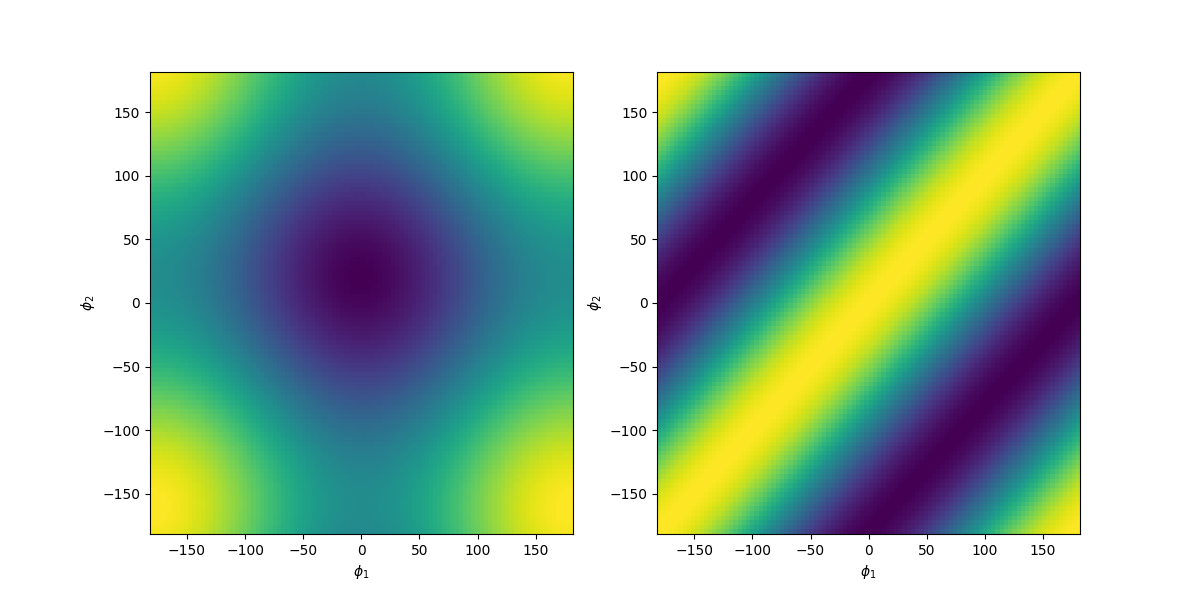

In [6]:
# plot heatmap of potential function
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# create a meshgrid of theta1 and theta2
phi1 = np.linspace(-np.pi, np.pi, 100)
phi2 = np.linspace(-np.pi, np.pi, 100)
phi1, phi2 = np.meshgrid(phi1, phi2)

# define the parameters
T = 10
J12 = 150
J1 = 300
J2 = 300
A1 = 1
A2 = 1
omega1 = np.radians(20)
omega2 = np.radians(0)

# calculate the potential
F = free_energy_phi(T, phi1, phi2, A1, A2, J12, J1, J2, omega1, omega2)

# plot the potential
ax1.pcolormesh(np.degrees(phi1), np.degrees(phi2), F, cmap='viridis')
ax1.set_xlabel(r'$\phi_1$')
ax1.set_ylabel(r'$\phi_2$')

# define the parameters
T = 0.2
J12 = 15
J1 = 30
J2 = 0
A1 = 1
A2 = 1
omega1 = np.radians(20)
omega2 = np.radians(0)

# calculate the potential
F = free_energy_alignament(T, phi1, phi2, A1, A2, J12, J1, J2)

# plot the potential
ax2.pcolormesh(np.degrees(phi1), np.degrees(phi2), F, cmap='viridis')
ax2.set_xlabel(r'$\phi_1$')
ax2.set_ylabel(r'$\phi_2$')

Text(0, 0.5, '$\\phi_2$')

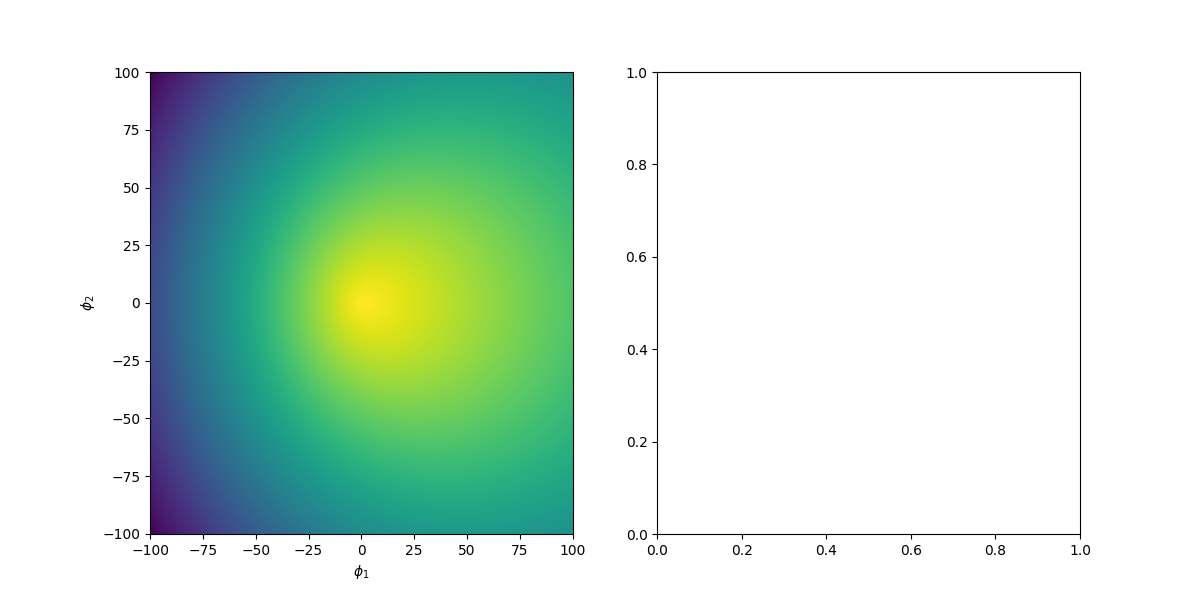

In [7]:
def free_energy(phi1x, phi1y, phi2x, phi2y, T=10, J12=10, J1=10, J2=0, omega1x=np.cos(np.radians(10)), omega1y=np.sin(np.radians(10)), omega2x=np.cos(np.radians(0)), omega2y=np.sin(np.radians(0))):
    return T/J12 * (phi1x*phi2x + phi1y*phi2y) + J1*J2/(T*J12) * (omega1x*omega2x + omega1y*omega2y) - 1/J12 * (J2*phi1x*omega2x + J1*phi2x*omega1x + J2*phi1y*omega2y + J1*phi2y*omega1y)- np.log(i0(np.sqrt(phi1x**2 + phi1y**2))) - np.log(i0(np.sqrt(phi2x**2 + phi2y**2)))


# plot heatmap of potential function
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# create a meshgrid of theta1 and theta2
phi2x = np.linspace(-100, 100, 1000)
phi2y = np.linspace(-100, 100, 1000)
phi2x, phi2y = np.meshgrid(phi2x, phi2y)

# define the parameters
T = 10
J12 = 1
J1 = 10
J2 = 10
phi1x, phi1y = [1.0462539829627164, 0.0]
omega1x, omega1y = [1,0]
omega2x, omega2y = [1,0]

# calculate the potential
F = free_energy(phi1x, phi1y, phi2x, phi2y, T, J12, J1, J2, omega1x, omega1y, omega2x, omega2y)


# plot the potential
ax1.pcolormesh(phi2x, phi2y, F, cmap='viridis')
ax1.set_xlabel(r'$\phi_1$')
ax1.set_ylabel(r'$\phi_2$')
